In [32]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
# 定义目标函数
def target_function(x):
    return x * x * x + x * x

# 生成数据，num_samples为样本数量
def generate_data(num_samples=100):
    x = np.linspace(0, 1, num_samples) # 生成从0到1的等间距样本点
    y = target_function(x)  #计算目标函数的值
    return x.reshape(-1, 1), y.reshape(-1, 1) # 返回x和y的列向量形式

x_train, y_train = generate_data(100) # 生成100个训练样本
x_test, y_test = generate_data(50)  # 生成50个测试样本

# 基于ReLU激活函数的神经网络类
class ReLUNet(nn.Module):
    def __init__(self):
        super(ReLUNet, self).__init__() # 初始化父类
        self.fc1 = nn.Linear(1, 10) # 定义第一个全连接层，输入1维，输出10维
        self.fc2 = nn.Linear(10, 10) # 定义第二个全连接层，输入10维，输出10维
        self.fc3 = nn.Linear(10, 1) # 定义第三个全连接层，输入10维，输出1维
        self.relu = nn.ReLU() # 定义ReLU激活函数
    
    # 前向传播过程
    def forward(self, x):
        x = self.relu(self.fc1(x)) # 第一层全连接层后接ReLU激活函数
        x = self.relu(self.fc2(x)) # 第二层全连接层后接ReLU激活函数
        x = self.fc3(x)  # 第三层全连接层，输出预测值
        return x


In [ ]:
# 训练模型
def train_model():
    model = ReLUNet() # 创建神经网络实例
    criterion = nn.MSELoss() # 定义损失函数为均方误差损失
    optimizer = optim.Adam(model.parameters(), lr=0.01) # 定义优化器为Adam，学习率为0.01
    
    x_train_tensor = torch.tensor(x_train, dtype=torch.float32) # 将训练数据转换为PyTorch张量
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
    
    for epoch in range(3000): # 训练3000个epoch
        optimizer.zero_grad() # 清零梯度
        output = model(x_train_tensor) # 前向传播，得到预测值
        loss = criterion(output, y_train_tensor) # 计算损失
        loss.backward() # 反向传播，计算梯度
        optimizer.step() # 更新模型参数
        
        if epoch % 100 == 0: # 每100个epoch打印一次损失
            print(f'Epoch {epoch}, Loss: {loss.item()}') # 打印当前epoch和损失值
    
    return model

In [ ]:
# 可视化拟合结果
def visualize_results():
    model_pytorch = train_model() # 训练模型并获取模型实例
    
    x_test_tensor = torch.tensor(x_test, dtype=torch.float32) # 将测试数据转换为PyTorch张量
    y_pred_pytorch = model_pytorch(x_test_tensor).detach().numpy() # 使用模型进行预测，并将预测结果转换为NumPy数组
    
    plt.scatter(x_test, y_test, label='True Function', color='black') # 绘制真实函数的散点图
    plt.plot(x_test, y_pred_pytorch, label='PyTorch Fit', color='blue') # 绘制模型拟合的曲线
    plt.legend() # 显示图例
    plt.show() # 显示图形

Epoch 0, Loss: 0.9817568063735962
Epoch 100, Loss: 0.00817372277379036
Epoch 200, Loss: 0.0012630170676857233
Epoch 300, Loss: 0.000729909457731992
Epoch 400, Loss: 0.00061476492555812
Epoch 500, Loss: 0.0005588025669567287
Epoch 600, Loss: 0.0005156631814315915
Epoch 700, Loss: 0.00047881726641207933
Epoch 800, Loss: 0.0004417927993927151
Epoch 900, Loss: 0.00041786328074522316
Epoch 1000, Loss: 0.00039225295768119395
Epoch 1100, Loss: 0.00037642772076651454
Epoch 1200, Loss: 0.0003648182610049844
Epoch 1300, Loss: 0.0003552273556124419
Epoch 1400, Loss: 0.00034648561268113554
Epoch 1500, Loss: 0.00033788717701099813
Epoch 1600, Loss: 0.00032904918771237135
Epoch 1700, Loss: 0.00031982481596060097
Epoch 1800, Loss: 0.0003101336769759655
Epoch 1900, Loss: 0.0003000698343385011
Epoch 2000, Loss: 0.00028973218286409974
Epoch 2100, Loss: 0.0002792872837744653
Epoch 2200, Loss: 0.0002689273387659341
Epoch 2300, Loss: 0.00025886588264256716
Epoch 2400, Loss: 0.000249347067438066
Epoch 2500,

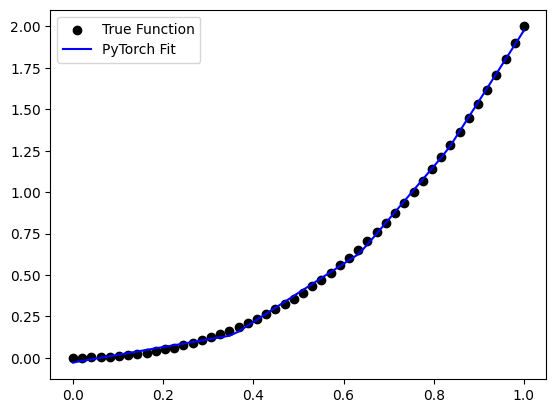

In [ ]:
visualize_results() # 调用可视化函数，显示拟合结果